## multiple linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

## downloading data

In [5]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)


with open("FuelConsumption.csv", "wb") as file:
    file.write(response.content)

print("File downloaded successfully.")

File downloaded successfully.


## reading the data in

In [16]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [22]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [28]:
cdf = df[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,FUELCONSUMPTION_CITY,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,4,6.7,8.5,196
1,2.4,11.2,4,7.7,9.6,221
2,1.5,6.0,4,5.8,5.9,136
3,3.5,12.7,6,9.1,11.1,255
4,3.5,12.1,6,8.7,10.6,244
5,3.5,11.9,6,7.7,10.0,230
6,3.5,11.8,6,8.1,10.1,232
7,3.7,12.8,6,9.0,11.1,255
8,3.7,13.4,6,9.5,11.6,267


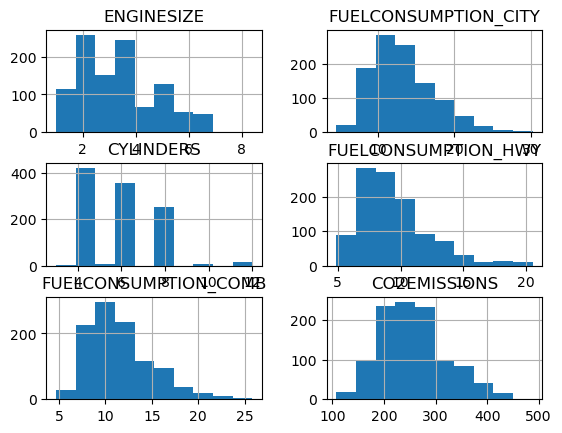

In [36]:
viz = cdf[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]
viz.hist()
plt.show()

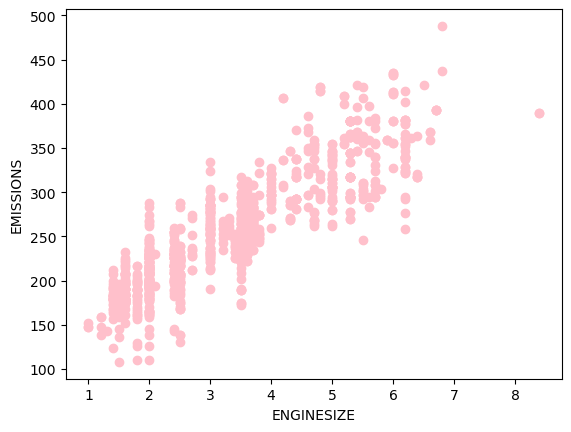

In [30]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color = 'pink')
plt.xlabel('ENGINESIZE')
plt.ylabel('EMISSIONS')
plt.show()

In [44]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print (msk)
print (~msk)
print (cdf)
print (train)
print (test)

[ True False False ...  True  True  True]
[False  True  True ... False False False]
      ENGINESIZE  FUELCONSUMPTION_CITY  CYLINDERS  FUELCONSUMPTION_HWY  \
0            2.0                   9.9          4                  6.7   
1            2.4                  11.2          4                  7.7   
2            1.5                   6.0          4                  5.8   
3            3.5                  12.7          6                  9.1   
4            3.5                  12.1          6                  8.7   
...          ...                   ...        ...                  ...   
1062         3.0                  13.4          6                  9.8   
1063         3.2                  13.2          6                  9.5   
1064         3.0                  13.4          6                  9.8   
1065         3.2                  12.9          6                  9.3   
1066         3.2                  14.9          6                 10.2   

      FUELCONSUMPTION_COMB 

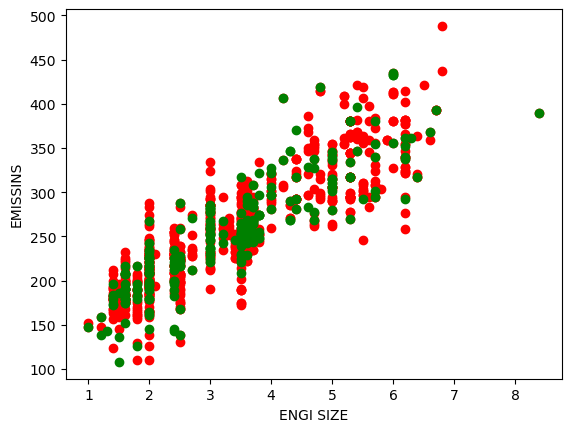

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'red')
ax1.scatter(test.ENGINESIZE , test.CO2EMISSIONS , color = 'green')
plt.xlabel('ENGI SIZE')
plt.ylabel('EMISSINS')
plt.show()

### sklean

In [51]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x , train_y)
print ('Coefficients:' , regr.coef_)
print ('intercept:' , regr.intercept_)

Coefficients: [[10.75352193  8.25375307  6.70383229]]
intercept: [71.68459812]


## نمودار رگرسیون خطی چندگانه

In [56]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1204.48
Variance score: 0.70


C:\Users\hello\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
